count    306.000000
mean       1.264706
std        0.441899
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: surv, dtype: float64
count     306
unique      2
top       yes
freq      225
Name: surv, dtype: object
yes    225
no      81
Name: surv, dtype: int64


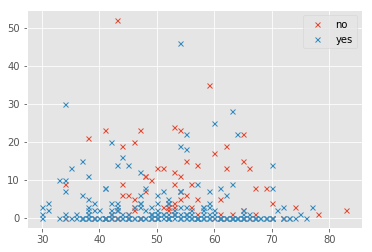

   age  year  nodes surv nodes0
0   30    64      1  yes  False
1   30    62      3  yes  False
2   30    65      0  yes   True
3   31    59      2  yes  False
4   31    65      4  yes  False
   age  year  nodes surv nodes0 nodes75
0   30    64      1  yes  False   False
1   30    62      3  yes  False   False
2   30    65      0  yes   True   False
3   31    59      2  yes  False   False
4   31    65      4  yes  False    True


nodes75,False,True
surv,,
no,39,42
yes,178,47


In [34]:
'''

date: "November 4, 2016"
output: html_document
'''

'''
# 1 Banknote authentication  1.1 Problem
Preface
One of the first steps in the analysis of a new dataset, often as part of data cleaning, typically involves generation of high level summaries, such as: how many
observations, attributes, which ones are predictors and which ones are (could
be?) outcomes, what are their ranges, distributions, percentages of missing values, how strongly correlated are the predictors among themselves and with the
outcome(s), etc. It is usually at this stage when we develop our initial intuition
about the level of difficulty of the problem and of the challenges presented by
this particular dataset and therefore form our first set of ideas as to how to
approach it. There are many multivariate methods under unsupervised learning umbrella that are extremely useful in this setting (that will be introduced
later in the course), but first things first, and here we will start by loading few
datasets into R and exploring their attributes in the form of bivariate plots and
contingency tables (where applicable).
For this assignment we will use several datasets available from UCI machine learning repository (http://archive.ics.uci.edu/ml/datasets.html).
They can be loaded into R using function read.table with necessary options (of
which most useful/relevant include: sep â defining field separator and header
â instructing read.table to use fields in the first line as column headers).
read.table can use URL as a full path to the dataset, or, to be able to
work independently of network connection, download those datasets locally and
provide read.table with appropriate paths to their local copies. Remember,
help(read.table) (or, ?read.table as a shorthand) will tell you quite a bit
about this function and its parameters.
For those datasets that do not have column names included in their data
files, it is often convenient to assign them explicitly. Please note that for some
of these datasets categorical variables are encoded in the form of integer values,
that by default R will interpret as continuous variables while the behavior of
many R functions depends on the type of the input variables.
The code excerpts and their output presented below illustrate some of these
most basic steps as applied to one of the datasets available from UCI. The
homework problems follow after that â they will require you to apply similar
kind of approaches to generate high levels summaries of few other UCI datasets.
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

dataURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
habDat = pd.read_csv(dataURL,header=None)
habDat.rename(columns={0:'age',1:'year',2:'nodes',3:'surv'}, inplace=True)
#print(habDat.head())
summary = habDat['surv'].describe()
print(summary)

habDat['surv'] = habDat['surv'].apply({1:'yes', 2:'no'}.get)
## print summary of categorical surv
print(habDat['surv'].describe())
# print a frequncy count of surv categories similar to what factor() does in R 
print(habDat['surv'].value_counts())



## Note we don't need to explicitly convert surv into a factor as done in R 
## Python implicitly converts it into a catgoeical variable based on last statement

## Grouped scatter plot
df = pd.DataFrame(dict(x=habDat['age'], y=habDat['nodes'], label=habDat['surv']))
groups = df.groupby('label')


# Plot
fig, ax = plt.subplots(nrows=1, ncols=1)
for name, group in groups:
    #print(name)
    ax.plot(group.x, group.y, marker='x', linestyle='', ms=5, label=name)
    ## need to show these as seperate plots side by side .. will fix this later
ax.legend()
plt.show()


'''
### this piece has problem with smoothers.py. will fix it later but it is put here 
## to mimim lines 74-76 on file_2.Rmd

from ggplot import *
ggplot(aes(x='age', y='nodes', color='surv',shape='surv'), data=habDat) +\
geom_point(size=50) +\
facet_wrap(~surv)


'''

'''
It seems that higher number of nodes might be associated with lower probability of survival. One attempt to quantify this relationship might involve
testing relationship between indicators of survival and count of nodes exceeding
arbitrarily chosen cutoffs (zero or 75th percentile in the example below). There
is also substantial degree of overplotting due to integer values of node count and
year that might, for instance, make it less apparent that not all patients with
zero nodes survive if all of them were plotted in the same panel.
'''
habDat['nodes0'] = np.where(habDat['nodes']==0, 'True', 'False')
print(habDat.head())
pd.crosstab(habDat['surv'], habDat['nodes0'], rownames=['surv'], colnames=['nodes0'])
    
habDat['nodes75'] = np.where(habDat['nodes']>=np.quantile(habDat['nodes'],0.75), 'True', 'False')
print(habDat.head())
pd.crosstab(habDat['surv'], habDat['nodes75'], rownames=['surv'], colnames=['nodes75'])


'''
THIS COMPLETES CODING UPTO LINE 197 OF File_2.Rmd 
'''







         0       1       2        3  4
0  3.62160  8.6661 -2.8073 -0.44699  0
1  4.54590  8.1674 -2.4586 -1.46210  0
2  3.86600 -2.6383  1.9242  0.10645  0
3  3.45660  9.5228 -4.0112 -3.59440  0
4  0.32924 -4.4552  4.5718 -0.98880  0
       var    skew    curt     entr  auth
0  3.62160  8.6661 -2.8073 -0.44699     0
1  4.54590  8.1674 -2.4586 -1.46210     0
2  3.86600 -2.6383  1.9242  0.10645     0
3  3.45660  9.5228 -4.0112 -3.59440     0
4  0.32924 -4.4552  4.5718 -0.98880     0
               var         skew         curt         entr
count  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657
std       2.842763     5.869047     4.310030     2.101013
min      -7.042100   -13.773100    -5.286100    -8.548200
25%      -1.773000    -1.708200    -1.574975    -2.413450
50%       0.496180     2.319650     0.616630    -0.586650
75%       2.821475     6.814625     3.179250     0.394810
max       6.824800    12.951600    17.927400     2

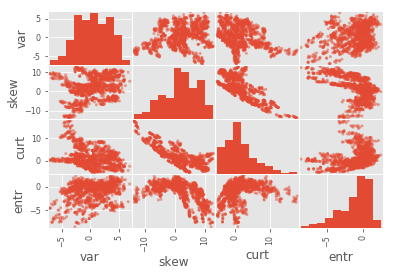

In [48]:
'''
Please feel free to model your solutions after the examples shown above, while
exercising necessary judgement as to which attributes are best represented as
continuous and which ones â as categorical, etc. The descriptions of homework
problems provide some guidance as to what is expected, but leave some of those
choices up to you. Making such calls is an integral part of any data analysis
project and we will be working on advancing this skill throughout this course.

# 1 Banknote authentication 
This dataset presents an example of classification problem (authentic vs. coun- terfeit bank notes) using continuous predictors derived from image process- ing. 
More details about underlying data can be found at http://archive. ics.uci.edu/ml/datasets/banknote+authentication. To load data into R "00267/data_banknote_authentication.txt" 
can be used as datURL in the example shown above.
Once the dataset in loaded into R, please name appropriately data set at- tributes, 
determine number of variables (explain which ones are predictors and which one is outcome) and observations 
in the dataset (R functions such as dim, nrow, ncol could be useful for this), generate summary of the data using summary function in R 
and generate pairwise XY-scatterplots of each pair of continuous predictors indicating outcome using colour and/or shape of the sym- bols 
(you may find it convenient to use pairs plotting function). Describe your observations and discuss which of the variables are more 
likely to be informative with respect to discriminating forged bank notes from genuine.
Please comment on whether given the data at hand such problem appears to easy or hard to solve and some of the tradeoffs 
that might be associated with that. For instance, should one expect the cost of calling genuine note counterfeit to be the same as making the opposite call 
(allowing fake bills as authentic). Consider also anticipated frequency of these cases in the practical settings and how it could potentially interact these costs.
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
dataURL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
dbaDat = pd.read_csv(dataURL,header=None)
print(dbaDat.head())

dbaDat.rename(columns={0:'var',1:'skew',2:'curt',3:'entr',4:'auth'}, inplace=True)
print(dbaDat.head())
dbaDat['auth'] = dbaDat['auth'].astype('object')
summary = dbaDat.describe()
print(summary)

pd.plotting.scatter_matrix(dbaDat)
print(dbaDat['auth'].value_counts())

'''
1372 observations, 4 predictors, one outcome 
(roughly evenly split between two levels: 762 and 610 observations in each)
in the dataset; variance and skew- ness as well as variance and curtosis
appear to be the most informative for discriminating between genuine and
counterfeit notes; assuming that relative frequency of counterfeit
notes in this dataset is likely substantially higher than that in 
circulation, it might be worth penalizing misclassification of genuine 
bills higher than misclassification of counterfeit ones; 
given the appearance of the data that could still detect 
majority of forged notes, while lessening the burden on the
majority of the consumers.
'''




   0      1      2      3       4       5       6      7   8
0  M  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.150  15
1  M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
2  F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
3  M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
4  I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7
  sex    len    dia      h      ww      sw      vw     sh  rings
0   M  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.150     15
1   M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070      7
2   F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210      9
3   M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155     10
4   I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055      7
  sex    len    dia      h      ww      sw      vw     sh  rings   age
0   M  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.150     15  16.5
1   M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070      7   8.5
2   F  0.530  0.420  0.135  0.6

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021DE8DADDA0>,
      dtype=object)

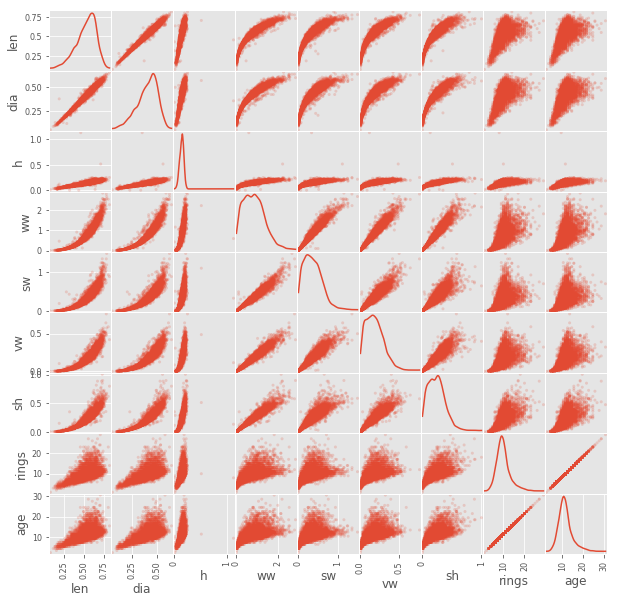

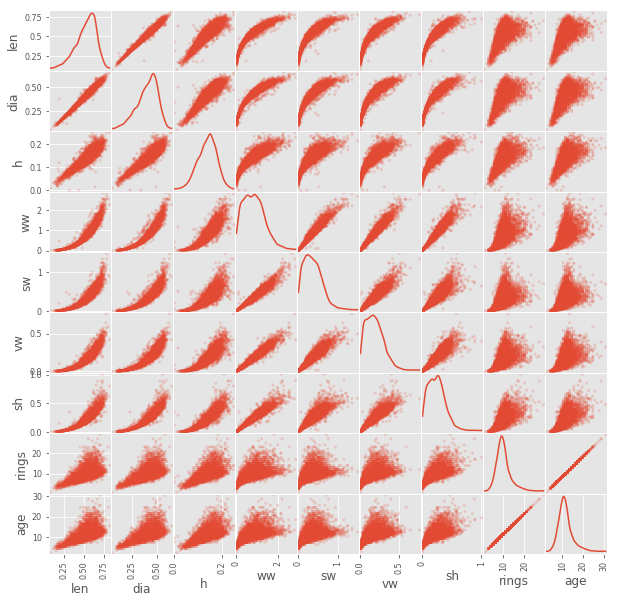

In [57]:
'''
# Abalone age
This dataset presents an example of regression problem â 
predicting mollusc age from measurements that are easier 
to obtain. More details about underlying data can be found 
at http://archive.ics.uci.edu/ml/datasets/Abalone. 
To load data into R "abalone/abalone.data" can be used as datURL 
in the example shown above.
Once the dataset in loaded into R, please name appropriately 
data set at- tributes, determine number of variables 
(explain which ones are predictors â categorical vs. continuous â 
and which one is the outcome) and observations in the dataset 
(R functions such as dim, nrow, ncol could be useful for this), generate summary of the data using summary function in R and generate pair- wise XY-scatterplots of each pair of continuous attributes.
Describe your observations and discuss which attributes might be 
more use- ful for predicting snail age.
For extra 10 points for some of the continuous and categorical 
predictors generate boxplots rendering relationship between them
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
dataURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
abaDat = pd.read_csv(dataURL,header=None)
print(abaDat.head())
abaDat.rename(columns={0:'sex',1:'len',2:'dia',3:'h',4:'ww',5:'sw',6:'vw',7:'sh',8:'rings'}, inplace=True)
print(abaDat.head())

abaDat['age'] = abaDat['rings'] + 1.5 
print(abaDat.head())
pd.plotting.scatter_matrix(abaDat,alpha=0.2, figsize=(10, 10),diagonal='kde')
print(abaDat)

'''

And excluding the two highest values for height â 
notice how height now doesnât look so vastly different from other attributes:


'''
abaDat_subset = abaDat[abaDat['h'] < 0.5]
print(abaDat_subset)
pd.plotting.scatter_matrix(abaDat_subset,alpha=0.2, figsize=(10, 10),diagonal='kde')

'''
4177 observations, 8 possible predictors, two outcomes (rings/age) that 
are different just by a constant; modest degree of correlation
between predictors (univariately) and the outcome(s); possibly 
some non-linearity in untransformed data; high level of correlation 
between attributes to be used as predictors and their weaker correlation
with outcome(s) to be modeled (rings and/or age) 
will be the challenges for this regression problem.
'''

'''
ggplot

'''
